In [1]:
df <- read.table("housing.data", header = FALSE)
colnames(df) <- c("crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat", "medv")

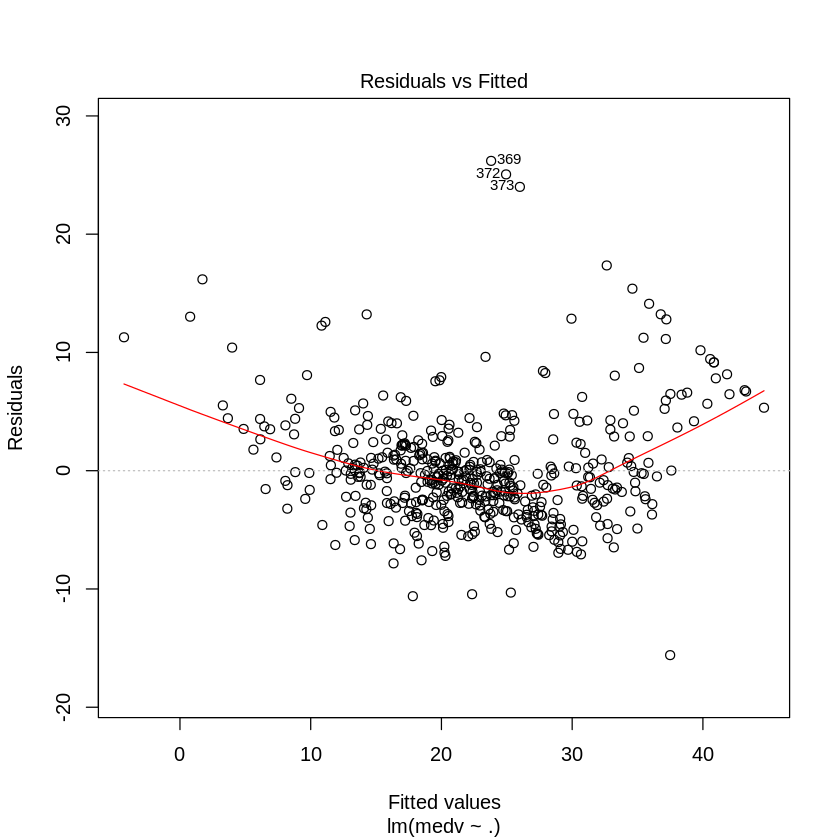

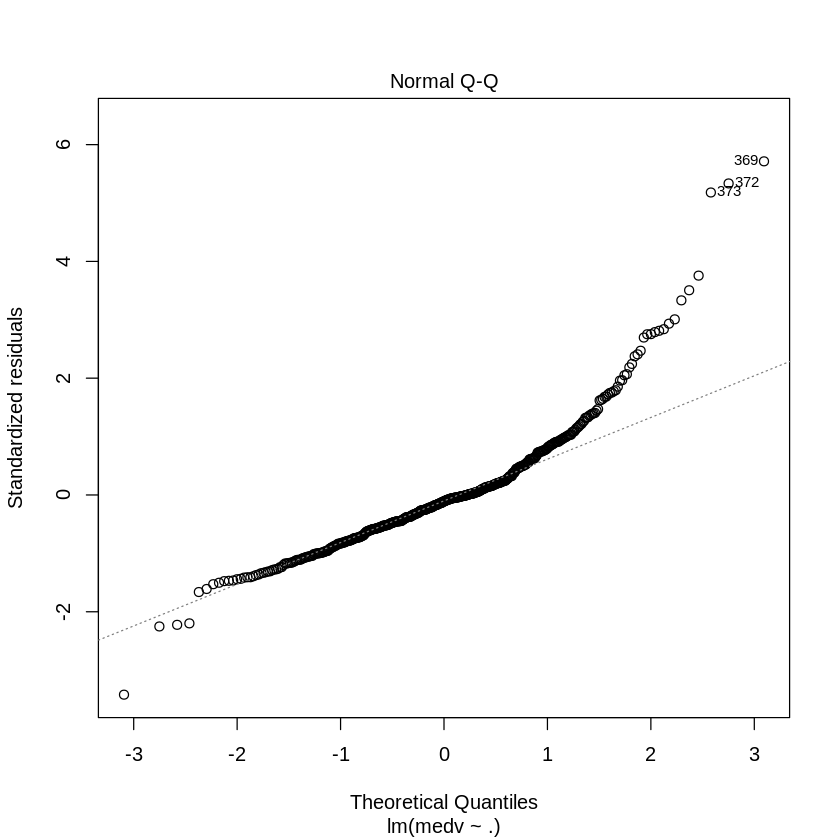

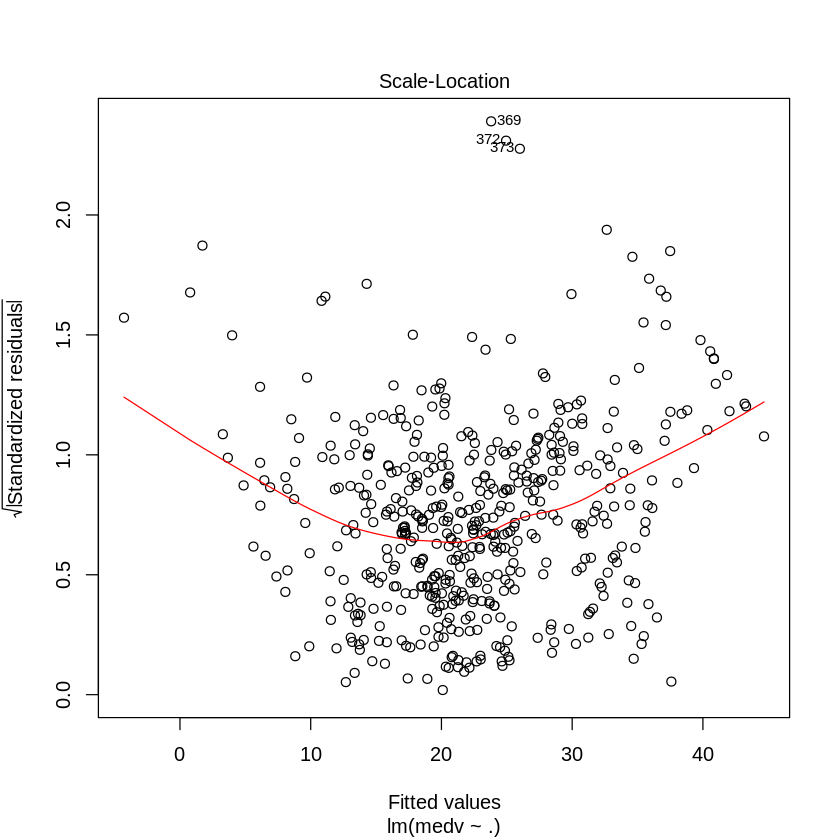

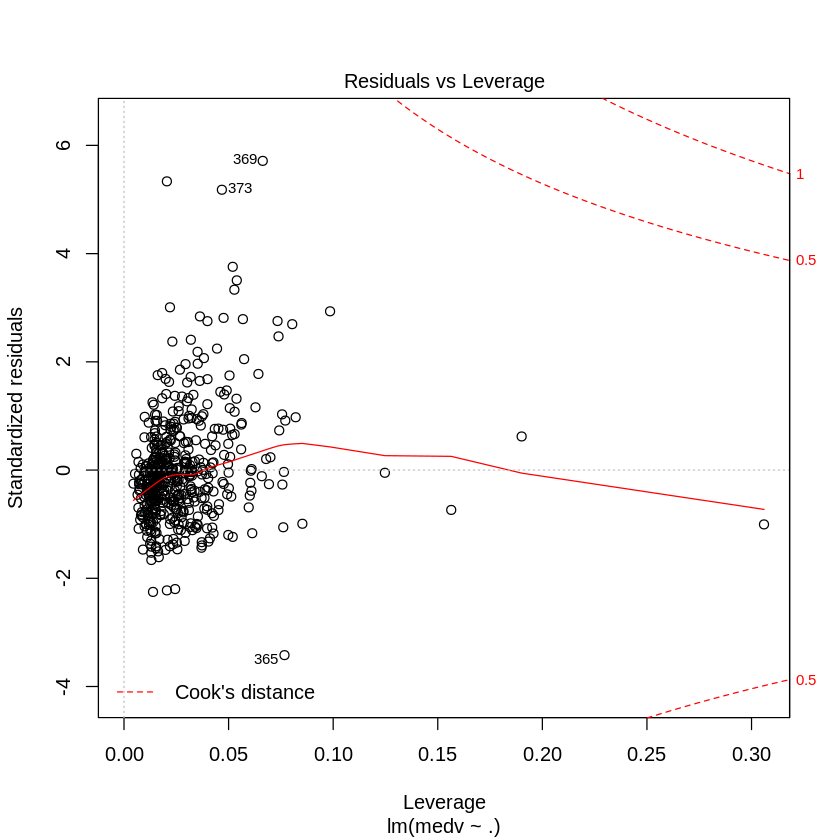

In [10]:
model <- lm(medv ~ ., data=df)
plot(model)

In [3]:
rd <- abs(rstandard(model))
srd <- rd[order(-rd)]
head(srd)

369      372      373      370      413      365 
5.713855 5.335291 5.180330 3.756430 3.505841 3.420118

In [4]:
hv <- hatvalues(model)
shv <- hv[order(-hv)]
head(shv)

381        419        406        411        366        156 
0.30595949 0.19010096 0.15643251 0.12470699 0.09851493 0.08527666

In [5]:
cd <- cooks.distance(model)
scd <- cd[order(-cd)]
head(scd)

369        373        365        366        370        413 
0.16567369 0.09409651 0.06942966 0.06718425 0.05526255 0.05004117

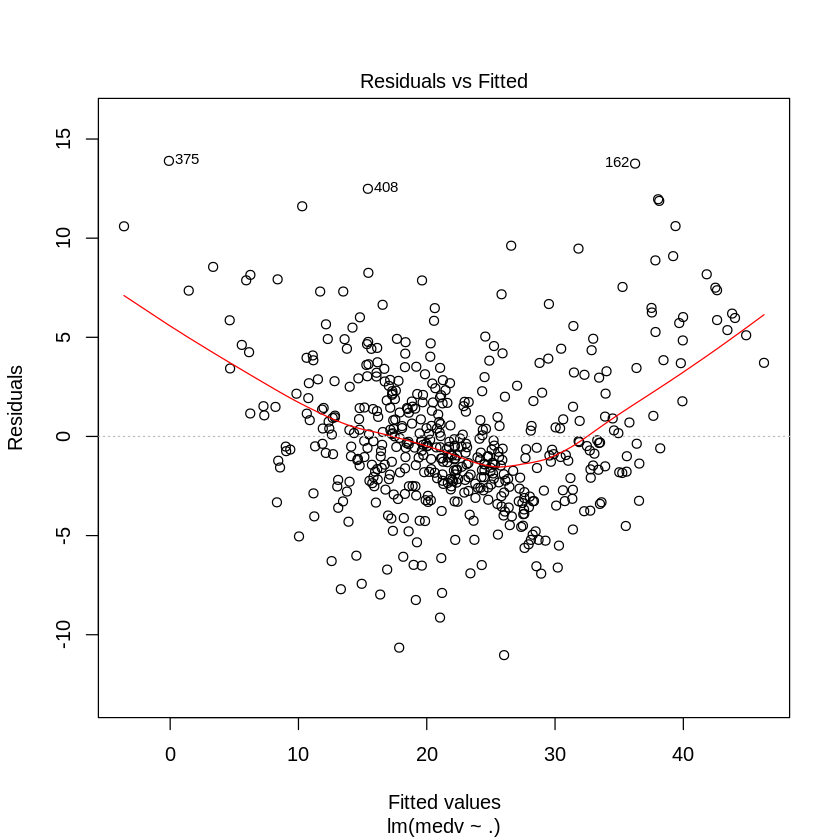

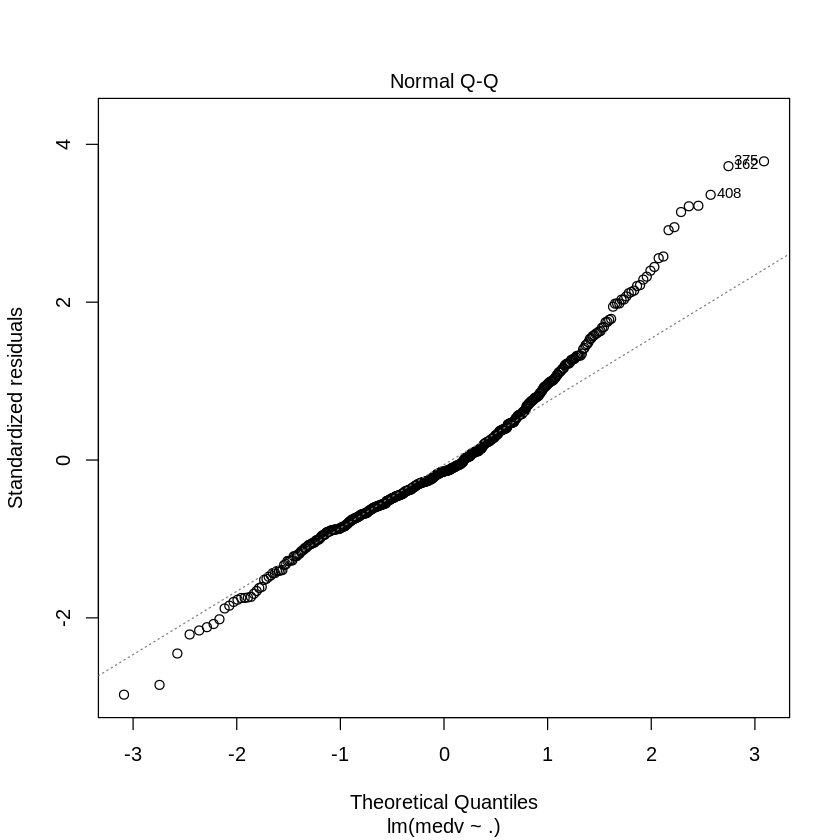

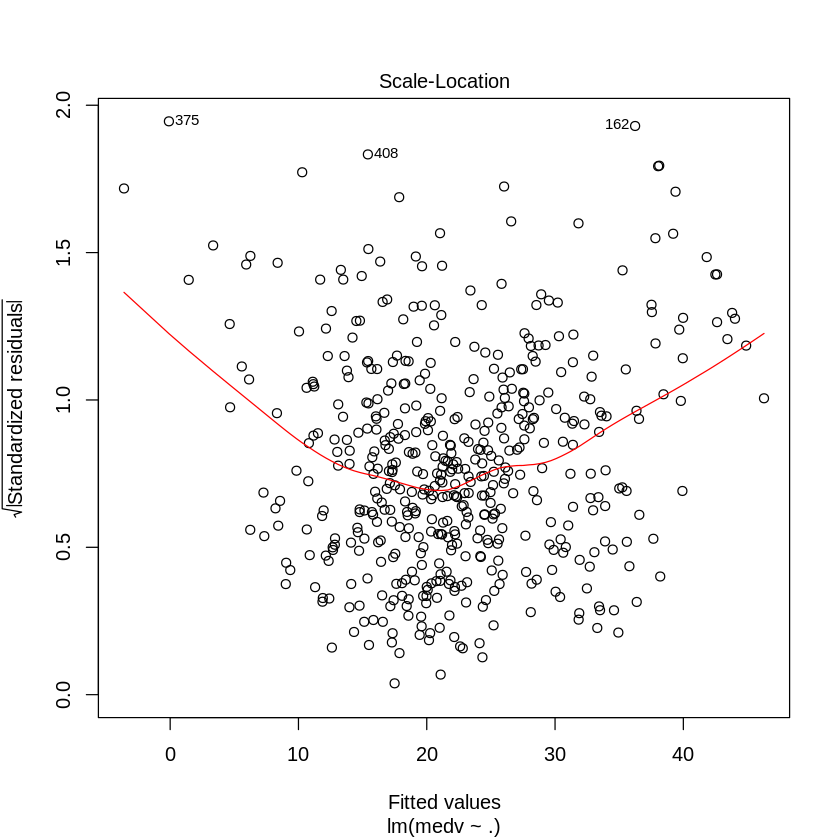

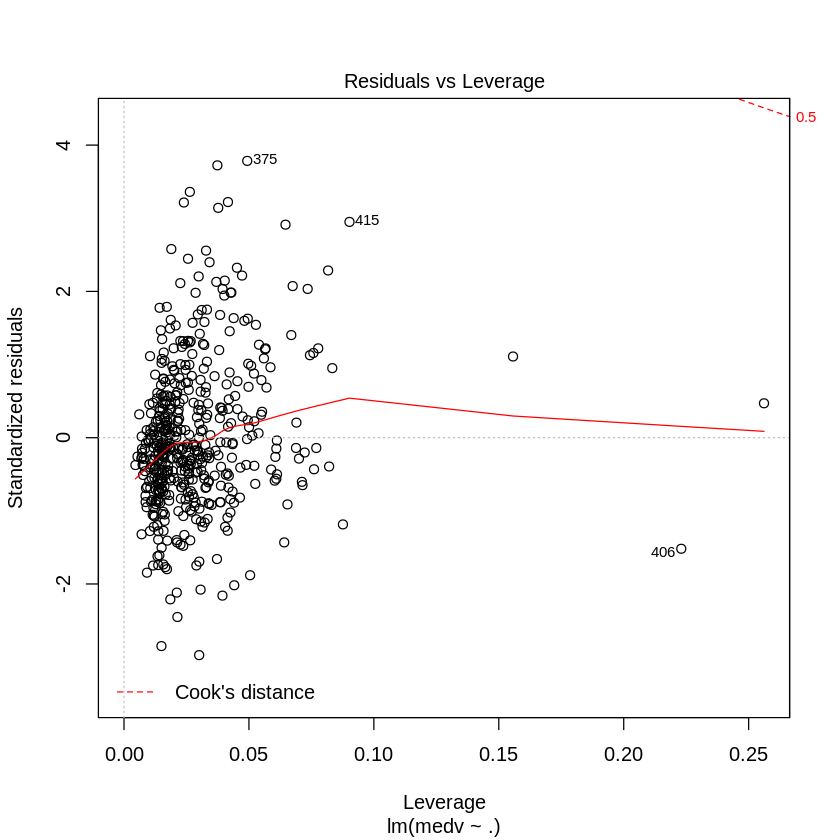

In [6]:
trimmed <- df[-c(369, 372, 373, 370, 366, 368, 371, 413, 365, 381), ]
model_trimmed <- lm(medv ~ ., data=trimmed)
plot(model_trimmed)

In [7]:
library(MASS)

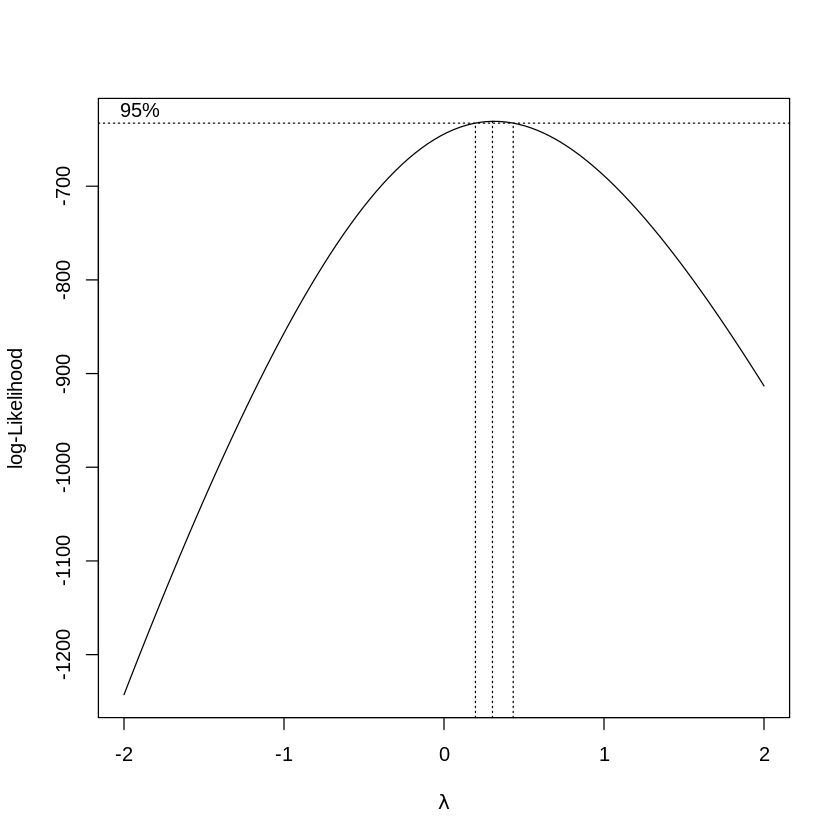

In [9]:
bc <- boxcox(model_trimmed)

In [ ]:
lambda <- bc$x[which.max(bc$y)]
lambda

In [ ]:
transformed <-transform(trimmed, medv = (medv^(lambda) - 1)/lambda)
model_transformed <- lm(medv ~ ., data=transformed)
plot(model_transformed)

In [ ]:
plot(fitted(model_transformed), transformed$medv)
abline(a=0, b=1)